# Calendar method

---
Use last cycle's ovulation date as guess for this one.

In [11]:
%pylab --no-import-all inline

from os import path
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = path.join("..", "data", "processed", "df.csv")
df = pd.read_csv(file, index_col=0)

In [3]:
calendar_guess = df.groupby(['ID', 'GROUP_ID'])['L_PREOVULATION'].apply(lambda x: x.shift(1))

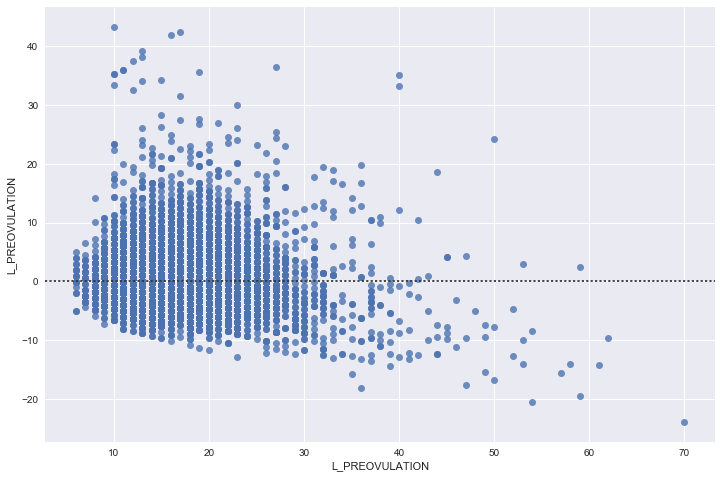

In [36]:
sns.residplot(x=df.L_PREOVULATION, y=calendar_guess, order=0);

In [18]:
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [41]:
def modified_bland_altman_plot(x, y, ax=None, *args, **kwargs):
    """Plot the difference between a prediction and truth.

    Parameters
    ----------
    x : vector
        Data for true value.
    y : vector
        Data for predicted value.
    ax : matplotlib axis, optional
        Plot into this axis, otherwise grab the current axis or make a new
        one if not existing.

    Returns
    -------
    ax: matplotlib axes
        Axes with the regression plot.


    """
    x     = np.asarray(x)
    y     = np.asarray(y)
    diff      = y - x
    
    x_j = 0.1
    x = x + np.random.uniform(-x_j, x_j, len(x))

    if ax is None:
        ax = plt.gca()
        
    # Plot a horizontal line at 0
    ax.axhline(0, ls=":", c=".2")
    
    plt.scatter(x, diff, *args, **kwargs)

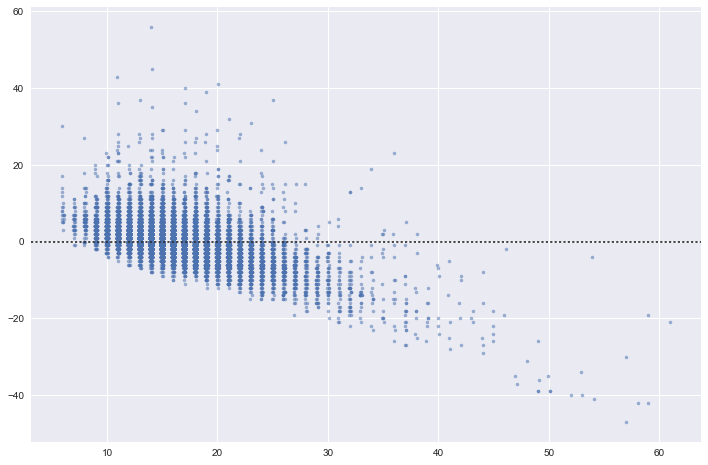

In [44]:
modified_bland_altman_plot(calendar_guess, df.L_PREOVULATION, s=10, alpha=0.5)